In [1]:
from melee_dataset import MeleeDataset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from torch.distributions import Categorical
from torch.distributions import Bernoulli,Normal
import matplotlib.pyplot as plt
from PolicyNet import PolicyNet
import torch.nn.functional as F
from Agents.BCAgent import BCAgent

%load_ext autoreload
%autoreload 2

In [2]:
train_dataset = MeleeDataset(data_path="data/train_mini_5")
# train_dataset = MeleeDataset(data_path="data/train_mini_40")
# train_dataset = MeleeDataset(data_path="data/train_mini_5_fox_falco_dl")
# train_dataset = MeleeDataset(data_path="data/train_mini_10_with_hitstun")
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# val_dataset = MeleeDataset(data_path="data/val_mini_1")
# val_dataset = MeleeDataset(data_path="data/val_mini_10")
# val_dataset = MeleeDataset(data_path="data/val_mini_2_with_hitstun")
# val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)


In [3]:
print(f"obs_dim: {train_dataset[0][0].shape}")
print(f"act_dim: {train_dataset[0][1].shape}")

obs_dim: torch.Size([70])
act_dim: torch.Size([17])


In [6]:

from Agents.BCAgent import BCAgent
from Agents.IQLAgent import IQLAgent
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
obs_dim = train_dataset[0][0].shape[0]
act_dim = train_dataset[0][1].shape[0]
agent = BCAgent(obs_dim, act_dim, device)
# agent = IQLAgent(obs_dim, act_dim, device, param_update_freq=50)

# set the seed
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

losses = []
val_losses = []
batch_cnt = 0
for epoch in range(200):
    total_loss = 0.0
    for i, (states, actions, next_states) in tqdm(enumerate(train_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)
        # for i in range(1000):
        loss = agent.train(states, actions, next_states)
        # vl, ql, pl = loss
        # print(loss)
        losses.append(loss)
        # break
        # total_loss += pl * states.shape[0]
        total_loss += loss * states.shape[0]
        batch_cnt += 1

        # if batch_cnt % 355 == 0:
        #     val_loss = 0.0  
        #     for i, (states, actions, next_states) in tqdm(enumerate(val_loader)):
        #         states = states.to(device)       # [B, obs_dim]
        #         actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        #         next_states = next_states.to(device)

        #         val_loss += agent.validate(states, actions)
        #     avg_val_loss = val_loss / len(val_dataset)
        #     val_losses.append(avg_val_loss)
        #     print(f"Epoch {epoch+1} — Val Loss: {avg_val_loss:.4f}")

    if epoch % 10 == 9:
        torch.save(agent.policy_net.state_dict(), f"checkpoints/bc_{epoch}.pth")
    

    avg_loss = total_loss / len(train_dataset)
    # losses.append(avg_loss)
    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f}")




Using device: cuda


355it [00:01, 348.97it/s]


Epoch 1 — Loss: 14.5954


355it [00:00, 374.40it/s]


Epoch 2 — Loss: 11.5382


355it [00:00, 376.60it/s]


Epoch 3 — Loss: 8.9073


355it [00:00, 381.48it/s]


Epoch 4 — Loss: 6.8198


355it [00:00, 407.47it/s]


Epoch 5 — Loss: 5.0501


355it [00:00, 395.49it/s]


Epoch 6 — Loss: 3.5044


355it [00:00, 431.86it/s]


Epoch 7 — Loss: 2.1780


355it [00:00, 447.49it/s]


Epoch 8 — Loss: 0.9747


355it [00:00, 373.05it/s]


Epoch 9 — Loss: -0.1392


355it [00:00, 393.13it/s]


Epoch 10 — Loss: -1.1692


355it [00:00, 366.76it/s]


Epoch 11 — Loss: -2.1399


355it [00:00, 384.34it/s]


Epoch 12 — Loss: -3.0362


355it [00:00, 389.50it/s]


Epoch 13 — Loss: -3.8655


355it [00:00, 384.25it/s]


Epoch 14 — Loss: -4.6341


355it [00:00, 364.30it/s]


Epoch 15 — Loss: -5.3747


355it [00:00, 379.59it/s]


Epoch 16 — Loss: -6.0845


355it [00:00, 379.75it/s]


Epoch 17 — Loss: -6.7522


355it [00:00, 417.32it/s]


Epoch 18 — Loss: -7.4330


355it [00:00, 428.43it/s]


Epoch 19 — Loss: -8.0709


355it [00:00, 425.62it/s]


Epoch 20 — Loss: -8.6881


355it [00:00, 400.33it/s]


Epoch 21 — Loss: -9.3208


355it [00:00, 377.55it/s]


Epoch 22 — Loss: -9.9517


355it [00:00, 367.02it/s]


Epoch 23 — Loss: -10.5517


355it [00:00, 360.80it/s]


Epoch 24 — Loss: -11.1700


355it [00:00, 367.12it/s]


Epoch 25 — Loss: -11.8056


355it [00:00, 360.77it/s]


Epoch 26 — Loss: -12.3929


355it [00:00, 360.55it/s]


Epoch 27 — Loss: -13.0363


355it [00:00, 356.58it/s]


Epoch 28 — Loss: -13.6220


355it [00:00, 398.11it/s]


Epoch 29 — Loss: -14.2440


355it [00:00, 377.41it/s]


Epoch 30 — Loss: -14.8688


355it [00:00, 364.10it/s]


Epoch 31 — Loss: -15.4738


355it [00:00, 384.04it/s]


Epoch 32 — Loss: -16.1296


355it [00:00, 379.39it/s]


Epoch 33 — Loss: -16.7987


355it [00:00, 375.62it/s]


Epoch 34 — Loss: -17.4042


355it [00:00, 368.64it/s]


Epoch 35 — Loss: -17.9536


355it [00:00, 374.29it/s]


Epoch 36 — Loss: -18.5846


355it [00:00, 381.13it/s]


Epoch 37 — Loss: -19.1895


355it [00:00, 367.89it/s]


Epoch 38 — Loss: -19.7623


355it [00:00, 388.91it/s]


Epoch 39 — Loss: -20.4343


355it [00:00, 369.63it/s]


Epoch 40 — Loss: -21.0921


355it [00:00, 370.48it/s]


Epoch 41 — Loss: -21.7735


355it [00:00, 382.91it/s]


Epoch 42 — Loss: -22.3763


355it [00:00, 411.91it/s]


Epoch 43 — Loss: -22.9795


355it [00:00, 405.32it/s]


Epoch 44 — Loss: -23.5885


355it [00:00, 445.43it/s]


Epoch 45 — Loss: -24.2236


355it [00:00, 402.93it/s]


Epoch 46 — Loss: -24.8261


355it [00:00, 428.63it/s]


Epoch 47 — Loss: -25.3990


355it [00:00, 400.65it/s]


Epoch 48 — Loss: -26.0230


355it [00:00, 419.22it/s]


Epoch 49 — Loss: -26.6153


355it [00:00, 401.22it/s]


Epoch 50 — Loss: -27.2493


355it [00:00, 384.91it/s]


Epoch 51 — Loss: -27.8878


355it [00:00, 394.16it/s]


Epoch 52 — Loss: -28.4998


355it [00:00, 377.28it/s]


Epoch 53 — Loss: -29.1326


355it [00:00, 417.68it/s]


Epoch 54 — Loss: -29.7438


355it [00:00, 410.41it/s]


Epoch 55 — Loss: -30.3182


355it [00:00, 377.66it/s]


Epoch 56 — Loss: -30.8376


355it [00:00, 405.82it/s]


Epoch 57 — Loss: -31.4073


355it [00:00, 396.24it/s]


Epoch 58 — Loss: -32.0129


355it [00:00, 423.81it/s]


Epoch 59 — Loss: -32.5793


355it [00:00, 432.84it/s]


Epoch 60 — Loss: -33.1991


355it [00:00, 393.53it/s]


Epoch 61 — Loss: -33.7832


355it [00:00, 413.33it/s]


Epoch 62 — Loss: -34.3457


355it [00:00, 372.13it/s]


Epoch 63 — Loss: -34.9314


355it [00:00, 391.07it/s]


Epoch 64 — Loss: -35.5316


355it [00:00, 397.76it/s]


Epoch 65 — Loss: -36.1146


355it [00:00, 397.79it/s]


Epoch 66 — Loss: -36.6485


355it [00:00, 412.40it/s]


Epoch 67 — Loss: -37.2702


355it [00:00, 382.08it/s]


Epoch 68 — Loss: -37.8357


355it [00:00, 444.89it/s]


Epoch 69 — Loss: -38.3292


355it [00:00, 410.43it/s]


Epoch 70 — Loss: -38.8969


355it [00:00, 383.61it/s]


Epoch 71 — Loss: -39.4587


355it [00:00, 394.51it/s]


Epoch 72 — Loss: -40.0149


355it [00:00, 398.69it/s]


Epoch 73 — Loss: -40.5228


355it [00:00, 413.05it/s]


Epoch 74 — Loss: -41.0696


355it [00:00, 424.43it/s]


Epoch 75 — Loss: -41.6362


355it [00:00, 385.52it/s]


Epoch 76 — Loss: -42.1587


355it [00:00, 414.66it/s]


Epoch 77 — Loss: -42.6969


355it [00:00, 397.40it/s]


Epoch 78 — Loss: -43.1856


355it [00:00, 393.61it/s]


Epoch 79 — Loss: -43.6265


355it [00:00, 385.84it/s]


Epoch 80 — Loss: -44.0834


355it [00:00, 427.25it/s]


Epoch 81 — Loss: -44.6209


355it [00:00, 397.64it/s]


Epoch 82 — Loss: -45.1507


355it [00:00, 427.03it/s]


Epoch 83 — Loss: -45.6141


355it [00:00, 417.25it/s]


Epoch 84 — Loss: -46.0165


355it [00:00, 427.93it/s]


Epoch 85 — Loss: -46.4997


355it [00:00, 362.95it/s]


Epoch 86 — Loss: -46.8974


355it [00:00, 387.04it/s]


Epoch 87 — Loss: -47.3241


355it [00:00, 385.77it/s]


Epoch 88 — Loss: -47.7724


355it [00:00, 390.59it/s]


Epoch 89 — Loss: -48.1513


355it [00:00, 383.60it/s]


Epoch 90 — Loss: -48.5432


355it [00:00, 372.19it/s]


Epoch 91 — Loss: -48.9511


355it [00:00, 405.92it/s]


Epoch 92 — Loss: -49.3864


355it [00:00, 405.83it/s]


Epoch 93 — Loss: -49.7595


355it [00:00, 381.80it/s]


Epoch 94 — Loss: -50.1964


355it [00:00, 377.84it/s]


Epoch 95 — Loss: -50.6060


355it [00:00, 383.17it/s]


Epoch 96 — Loss: -50.8801


355it [00:00, 375.43it/s]


Epoch 97 — Loss: -51.2338


355it [00:00, 415.59it/s]


Epoch 98 — Loss: -51.5522


355it [00:00, 426.17it/s]


Epoch 99 — Loss: -51.8612


355it [00:00, 371.20it/s]


Epoch 100 — Loss: -52.1842


355it [00:00, 377.17it/s]


Epoch 101 — Loss: -52.4606


355it [00:00, 370.91it/s]


Epoch 102 — Loss: -52.7243


355it [00:00, 380.68it/s]


Epoch 103 — Loss: -52.9388


355it [00:00, 373.55it/s]


Epoch 104 — Loss: -53.1904


355it [00:00, 367.63it/s]


Epoch 105 — Loss: -53.5817


355it [00:00, 378.54it/s]


Epoch 106 — Loss: -53.8051


355it [00:00, 372.08it/s]


Epoch 107 — Loss: -54.0672


355it [00:00, 389.24it/s]


Epoch 108 — Loss: -54.2945


355it [00:00, 422.00it/s]


Epoch 109 — Loss: -54.5011


355it [00:00, 395.93it/s]


Epoch 110 — Loss: -54.6957


355it [00:00, 431.48it/s]


Epoch 111 — Loss: -54.8681


355it [00:00, 396.78it/s]


Epoch 112 — Loss: -55.1154


355it [00:00, 377.84it/s]


Epoch 113 — Loss: -55.3444


355it [00:00, 409.80it/s]


Epoch 114 — Loss: -55.3761


355it [00:00, 362.53it/s]


Epoch 115 — Loss: -55.5636


355it [00:00, 402.37it/s]


Epoch 116 — Loss: -55.7286


355it [00:00, 429.81it/s]


Epoch 117 — Loss: -55.8606


355it [00:00, 410.68it/s]


Epoch 118 — Loss: -56.0917


355it [00:00, 398.69it/s]


Epoch 119 — Loss: -56.2370


355it [00:00, 358.80it/s]


Epoch 120 — Loss: -56.3305


355it [00:01, 345.50it/s]


Epoch 121 — Loss: -56.5060


355it [00:00, 355.57it/s]


Epoch 122 — Loss: -56.6708


355it [00:00, 357.72it/s]


Epoch 123 — Loss: -56.7986


355it [00:00, 393.88it/s]


Epoch 124 — Loss: -56.8943


355it [00:00, 394.17it/s]


Epoch 125 — Loss: -56.9020


355it [00:00, 413.82it/s]


Epoch 126 — Loss: -56.9784


355it [00:00, 356.64it/s]


Epoch 127 — Loss: -57.0634


355it [00:01, 351.73it/s]


Epoch 128 — Loss: -57.1617


355it [00:01, 353.17it/s]


Epoch 129 — Loss: -57.2532


355it [00:00, 361.71it/s]


Epoch 130 — Loss: -57.3415


355it [00:01, 352.46it/s]


Epoch 131 — Loss: -57.4569


355it [00:00, 364.11it/s]


Epoch 132 — Loss: -57.5844


355it [00:00, 418.42it/s]


Epoch 133 — Loss: -57.6641


355it [00:00, 387.12it/s]


Epoch 134 — Loss: -57.7395


355it [00:00, 433.22it/s]


Epoch 135 — Loss: -57.8276


355it [00:00, 413.31it/s]


Epoch 136 — Loss: -57.8394


355it [00:00, 404.01it/s]


Epoch 137 — Loss: -57.8994


355it [00:00, 388.12it/s]


Epoch 138 — Loss: -57.9407


355it [00:00, 373.12it/s]


Epoch 139 — Loss: -57.9450


355it [00:00, 388.77it/s]


Epoch 140 — Loss: -58.1032


355it [00:01, 346.35it/s]


Epoch 141 — Loss: -58.1342


355it [00:00, 375.83it/s]


Epoch 142 — Loss: -58.1600


355it [00:00, 431.92it/s]


Epoch 143 — Loss: -58.3082


355it [00:00, 419.21it/s]


Epoch 144 — Loss: -58.4393


355it [00:00, 384.52it/s]


Epoch 145 — Loss: -58.4075


355it [00:00, 370.89it/s]


Epoch 146 — Loss: -58.4401


355it [00:00, 368.11it/s]


Epoch 147 — Loss: -58.4956


355it [00:00, 392.89it/s]


Epoch 148 — Loss: -58.5435


355it [00:00, 374.43it/s]


Epoch 149 — Loss: -58.5829


355it [00:00, 376.47it/s]


Epoch 150 — Loss: -58.5813


355it [00:00, 406.61it/s]


Epoch 151 — Loss: -58.6787


355it [00:00, 385.31it/s]


Epoch 152 — Loss: -58.6647


355it [00:00, 396.64it/s]


Epoch 153 — Loss: -58.7571


355it [00:00, 360.13it/s]


Epoch 154 — Loss: -58.7206


355it [00:00, 363.93it/s]


Epoch 155 — Loss: -58.7360


355it [00:00, 401.72it/s]


Epoch 156 — Loss: -58.7808


355it [00:01, 352.94it/s]


Epoch 157 — Loss: -58.8055


355it [00:01, 352.67it/s]


Epoch 158 — Loss: -58.9140


355it [00:01, 347.19it/s]


Epoch 159 — Loss: -58.9089


355it [00:01, 351.90it/s]


Epoch 160 — Loss: -58.9253


355it [00:01, 350.66it/s]


Epoch 161 — Loss: -58.9437


355it [00:00, 370.18it/s]


Epoch 162 — Loss: -59.0388


355it [00:00, 367.81it/s]


Epoch 163 — Loss: -59.0196


355it [00:00, 400.59it/s]


Epoch 164 — Loss: -59.0418


355it [00:01, 353.34it/s]


Epoch 165 — Loss: -59.0436


355it [00:00, 380.09it/s]


Epoch 166 — Loss: -59.0832


355it [00:00, 410.43it/s]


Epoch 167 — Loss: -59.1454


355it [00:00, 423.25it/s]


Epoch 168 — Loss: -59.1184


355it [00:00, 420.76it/s]


Epoch 169 — Loss: -59.2452


355it [00:00, 380.39it/s]


Epoch 170 — Loss: -59.2710


355it [00:00, 373.21it/s]


Epoch 171 — Loss: -59.2536


355it [00:00, 360.84it/s]


Epoch 172 — Loss: -59.3154


355it [00:00, 427.80it/s]


Epoch 173 — Loss: -59.2948


355it [00:00, 441.14it/s]


Epoch 174 — Loss: -59.2514


355it [00:00, 434.72it/s]


Epoch 175 — Loss: -59.2379


355it [00:00, 376.78it/s]


Epoch 176 — Loss: -59.2533


355it [00:00, 426.67it/s]


Epoch 177 — Loss: -59.3044


355it [00:00, 436.62it/s]


Epoch 178 — Loss: -59.2938


355it [00:01, 346.10it/s]


Epoch 179 — Loss: -59.3612


355it [00:00, 365.98it/s]


Epoch 180 — Loss: -59.3812


355it [00:00, 369.57it/s]


Epoch 181 — Loss: -59.4434


355it [00:00, 370.32it/s]


Epoch 182 — Loss: -59.4127


355it [00:00, 399.16it/s]


Epoch 183 — Loss: -59.3960


355it [00:00, 367.07it/s]


Epoch 184 — Loss: -59.3558


355it [00:00, 366.56it/s]


Epoch 185 — Loss: -59.3225


355it [00:01, 340.44it/s]


Epoch 186 — Loss: -59.3204


355it [00:01, 352.24it/s]


Epoch 187 — Loss: -59.3431


355it [00:00, 360.64it/s]


Epoch 188 — Loss: -59.3029


355it [00:00, 378.83it/s]


Epoch 189 — Loss: -59.2349


355it [00:00, 359.95it/s]


Epoch 190 — Loss: -59.2378


355it [00:01, 349.60it/s]


Epoch 191 — Loss: -59.2077


355it [00:00, 368.68it/s]


Epoch 192 — Loss: -59.2405


355it [00:00, 376.08it/s]


Epoch 193 — Loss: -59.1760


355it [00:01, 342.63it/s]


Epoch 194 — Loss: -59.1571


355it [00:00, 387.23it/s]


Epoch 195 — Loss: -59.1410


355it [00:00, 366.09it/s]


Epoch 196 — Loss: -59.1729


355it [00:00, 371.92it/s]


Epoch 197 — Loss: -59.1080


355it [00:00, 387.69it/s]


Epoch 198 — Loss: -59.0263


355it [00:00, 371.87it/s]


Epoch 199 — Loss: -59.0155


355it [00:00, 388.96it/s]

Epoch 200 — Loss: -59.0143


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_smoothed(data, window=10, iqr_multiplier=1.5, label=None, xlabel=None, ylabel=None, title=None):
    """
    Plots smoothed data after removing outliers.
    
    Args:
        data (list or np.ndarray): The 1D data sequence to plot.
        window (int): Smoothing window size for moving average.
        iqr_multiplier (float): Outlier threshold multiplier (default 1.5).
        label (str): Label for the plot line.
        color (str): Line color.
    """
    data = np.asarray(data)

    # --- Step 1: Remove outliers ---
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - iqr_multiplier * iqr
    upper = q3 + iqr_multiplier * iqr
    mask = (data >= lower) & (data <= upper)
    filtered_data = data[mask]

    # --- Step 2: Smooth data using moving average ---
    def moving_average(x, w):
        return np.convolve(x, np.ones(w)/w, mode='valid')

    smoothed = moving_average(filtered_data, window)

    # --- Step 3: Plot ---
    x_vals = np.arange(len(smoothed))
    plt.figure()
    plt.plot(x_vals, smoothed, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if label:
        plt.legend()


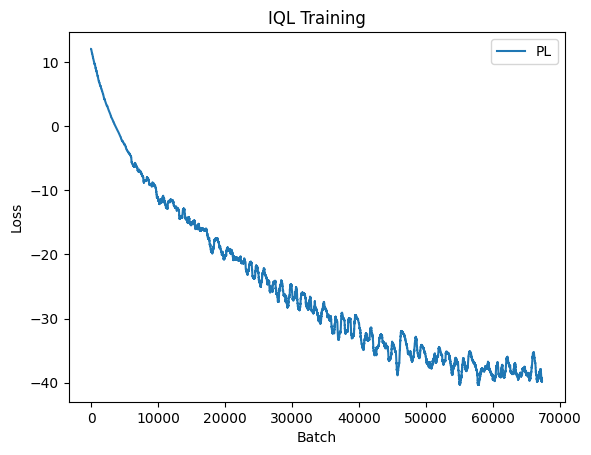

In [11]:
# plot_smoothed([losses[i][0] for i in range(len(losses))], window=1000, label="VL", xlabel="Batch", ylabel="Loss", title="IQL Training")
# plot_smoothed([losses[i][1] for i in range(len(losses))], window=1000, label="QL", xlabel="Batch", ylabel="Loss", title="IQL Training")
plot_smoothed([losses[i][2] for i in range(len(losses))], window=500, label="PL", xlabel="Batch", ylabel="Loss", title="IQL Training")
# plot_smoothed([losses[i] for i in range(len(losses))], window=500, label="Train Loss", xlabel="Batch", ylabel="Loss", title="BC Training")
# plt.plot([i*355 for i in range(len(val_losses))], val_losses, label="Val Loss")
plt.legend()

In [42]:
# Save the trained model
torch.save(agent.policy_net.state_dict(), "checkpoint_final/bc_5.pth")
# torch.save(agent.policy_net.state_dict(), "fox_5.pth")
# print("Model saved to trained_policy.pth")
